In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df_per2023 = pd.read_csv('../datasets/Personas_2023.csv', sep = ',')
df_per2022 = pd.read_csv('../datasets/Personas_2022.csv', sep = ',')
df_per2021 = pd.read_csv('../datasets/Personas_2021.csv', sep = ',')
df_per2020 = pd.read_csv('../datasets/Personas_2020.csv', sep = ';')
df_per2019 = pd.read_csv('../datasets/Personas_2019.csv', sep = ';')
df_per2018 = pd.read_csv('../datasets/Personas_2018.csv', sep = ';')
df_per2017 = pd.read_csv('../datasets/Personas_2017.csv', sep = ';')

C:\Users\Acer\AppData\Local\Temp\ipykernel_26860\1643573914.py:4: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_per2020 = pd.read_csv('../datasets/Personas_2020.csv', sep = ';')


In [90]:
import unidecode

# Function to remove accents
def remove_accents(word):
    return unidecode.unidecode(word)

def get_depto_name(code):
    matching_depto = [depto[1] for depto in deptos if depto[0] == code]
    if matching_depto:
        return matching_depto[0]
    else:
        return None  # Handle the case where no match is found

deptos = [
    (5, 'Antioquia'), 
    (8, 'Atlántico'),
    (11, 'Bogotá D.C.'),
    (13, 'Bolívar'),
    (15, 'Boyacá'),
    (17, 'Caldas'),
    (18, 'Caquetá'),
    (19, 'Cauca'),
    (20, 'Cesar'),
    (23, 'Córdoba'),
    (25, 'Cundinamarca'),
    (27, 'Chocó'),
    (41, 'Huila'),
    (44, 'La Guajira'),
    (47, 'Magdalena'),
    (50, 'Meta'),
    (52, 'Nariño'),
    (54, 'Norte de Santander'),
    (63, 'Quindío'),
    (66, 'Risaralda'),
    (68, 'Santander'),
    (70, 'Sucre'),
    (73, 'Tolima'),
    (76, 'Valle del Cauca')]

In [91]:
def filter_dataset_people(df, deptos, year, remove_accents):
    
    # Apply the title case to the columns
    df.columns = df.columns.str.lower()

    # Check for the presence of the department column
    if 'depto' in df.columns:
        df['depto'] = df['depto'].apply(lambda x: [depto[1] for depto in deptos if depto[0] == x][0])
    elif 'dpto' in df.columns:
        df['depto'] = df['dpto'].apply(lambda x: [depto[1] for depto in deptos if depto[0] == x][0])

    # Remove rows where depto is None (optional, based on your needs)
    df = df.dropna(subset=['depto'])
    
    # Remove accents from the columns
    df['depto'] = df['depto'].apply(remove_accents)
    df['dominio'] = df['dominio'].apply(remove_accents)
    
    # Applying the title case to the dominio column
    df['dominio'] = df['dominio'].str.title()
    
    # Delete 'Resto Urbano' and 'Rural' from the dominio column
    df = df[df['dominio'] != 'Resto Urbano']
    df = df[df['dominio'] != 'Rural']
    
    # Add the year column
    df['año'] = year
    df['regimen'] = df['p6100']
    df['actividad'] = df['p6240']
    
    if year in list(range(2021, 2024)):
        # Filter the columns
        df['estrato'] = None
        if year == 2021:
            df['educacion'] = df['p6210']
        else:
            df['educacion'] = df['p3042']
        df = df[['depto', 'dominio', 'año', 'estrato', 'regimen', 'educacion', 'actividad']]
    else:
        # Filter the columns
        df['estrato'] = df['estrato1']
        df['educacion'] = df['p6210']
        df = df[['depto', 'dominio', 'año', 'estrato', 'regimen', 'educacion', 'actividad']]
    
    return df


In [92]:
def filter_datasets_people(dfs, deptos, years, remove_accents, filter_dataset_people):
    df_17, df_18, df_19, df_20, df_21, df_22, df_23 = [filter_dataset_people(dfs[i], deptos, years[i], remove_accents) for i in range(len(dfs))]
    df = pd.concat([df_17, df_18, df_19, df_20, df_21, df_22, df_23])
    return df

In [93]:
def replace_dataset_people(df):
    df['regimen'] = df['regimen'].replace({'1': 'Contributivo', '2': 'Especial', '3': 'Subsidiado', '9': 'No sabe, no informa'})
    df['regimen'] = df['regimen'].replace({1.0: 'Contributivo', 2.0: 'Especial', 3.0: 'Subsidiado', 9.0: 'No sabe, no informa'})
    df['actividad'] = df['actividad'].replace({'1': 'Trabajando', '2': 'Buscando trabajo', '3': 'Estudiando', '4': 'Oficios del hogar', '5': 'Incapacitado permanente', '6': 'Otra actividad'})
    df['actividad'] = df['actividad'].replace({1.0: 'Trabajando', 2.0: 'Buscando trabajo', 3.0: 'Estudiando', 4.0: 'Oficios del hogar', 5.0: 'Incapacitado permanente', 6.0: 'Otra actividad'})
    df['educacion'] = df['educacion'].replace({'1': 'Ninguno', '2': 'Preescolar', '3': 'Básica primaria', '4': 'Básica secundaria', '5': 'Media', '6': 'Superior o Universitaria', '9': 'No sabe, no informa'})
    df['educacion'] = df['educacion'].replace({1.0: 'Ninguno', 2.0: 'Preescolar', 3.0: 'Básica primaria', 4.0: 'Básica secundaria', 5.0: 'Media', 6.0: 'Superior o Universitaria', 9.0: 'No sabe, no informa'})
    return df

In [94]:
dfs = [df_per2017, df_per2018, df_per2019, df_per2020, df_per2021, df_per2022, df_per2023]
years = list(range(2017,2024))

In [95]:
df_per = filter_datasets_people(dfs, deptos, years, remove_accents, filter_dataset_people)

In [96]:
df_per = replace_dataset_people(df_per)

In [97]:
df_per

,depto,dominio,año,estrato,regimen,educacion,actividad
0,Antioquia,Medellin,2017,2,Contributivo,Superior o Universitaria,Trabajando
1,Antioquia,Medellin,2017,2,Contributivo,Media,Otra actividad
2,Antioquia,Medellin,2017,2,Contributivo,Media,Otra actividad
3,Antioquia,Medellin,2017,2,Contributivo,Superior o Universitaria,Trabajando
4,Antioquia,Medellin,2017,4,Contributivo,Superior o Universitaria,Trabajando
...,...,...,...,...,...,...,...
814660,Risaralda,Pereira,2023,None,Contributivo,NaN,NaN
814661,Risaralda,Pereira,2023,None,Contributivo,Básica secundaria,NaN
814662,Risaralda,Pereira,2023,None,Contributivo,Básica primaria,NaN
814663,Choco,Quibdo,2023,None,Subsidiado,Básica secundaria,NaN


In [98]:
def give_people(df, **kwargs):
    # Check if the country, year, disaster type and geolocation are not None
    for key, value in kwargs.items():
        if value is not None:
            df = df[df[key] == value]
    return df

In [14]:
give_people(df_per, año = 2021, depto = 'Antioquia')

,depto,dominio,año,estrato,regimen,educacion,actividad
228,Antioquia,Medellin,2021,None,Contributivo,Básica primaria,Oficios del hogar
229,Antioquia,Medellin,2021,None,Contributivo,Básica secundaria,Buscando trabajo
230,Antioquia,Medellin,2021,None,Contributivo,Básica primaria,Otra actividad
231,Antioquia,Medellin,2021,None,Subsidiado,Superior o Universitaria,Oficios del hogar
285,Antioquia,Medellin,2021,None,NaN,NaN,NaN
...,...,...,...,...,...,...,...
705622,Antioquia,Medellin,2021,None,NaN,Media,Trabajando
705623,Antioquia,Medellin,2021,None,NaN,Superior o Universitaria,Trabajando
710961,Antioquia,Medellin,2021,None,Contributivo,Superior o Universitaria,Trabajando
710962,Antioquia,Medellin,2021,None,NaN,Preescolar,NaN


# Analysis

In [15]:
df_per2017 = give_people(df_per, año = 2017)
df_per2018 = give_people(df_per, año = 2018)
df_per2019 = give_people(df_per, año = 2019)
df_per2020 = give_people(df_per, año = 2020)
df_per2021 = give_people(df_per, año = 2021)
df_per2022 = give_people(df_per, año = 2022)
df_per2023 = give_people(df_per, año = 2023)

## Stratums

In [99]:
# Function to get a graph of the stratum distribution

def plot_stratum_distribution(df, year, typeDistribution, give_people):

    df_year = give_people(df, año = year)

    if typeDistribution == 'Bajo':
        c_year = df_year[df_year['estrato'].isin([1,2])].groupby('depto').size() / df_year.groupby('depto').size()
    
    elif typeDistribution == 'Medio':
        c_year = df_year[df_year['estrato'].isin([3,4])].groupby('depto').size() / df_year.groupby('depto').size()

    elif typeDistribution == 'Alto':
        c_year = df_year[df_year['estrato'].isin([5,6])].groupby('depto').size() / df_year.groupby('depto').size()
    
    # Data in ascending order
    c_year = c_year.sort_values()
    # Plot the graph

    plt.figure(figsize=(15, 8))

    sns.barplot(x = c_year.index, y = c_year)

    # Add the value of the percentage over the bars
    for i in range(len(c_year)):
        plt.text(i, c_year[i], round(c_year[i]*100, 2), ha = 'center', va = 'bottom')
    
    plt.title('Distribución de la población por estrato en el año ' + str(year) + ' en ' + typeDistribution + ' estrato')
    plt.xticks(rotation=90)
    plt.xlabel('Departamento')
    plt.ylabel('Porcentaje de la población')
    # Vary the color in the bars
    plt.bar(c_year.index, c_year, color = sns.color_palette('viridis', len(c_year)))
    plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_26860\1883484496.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, c_year[i], round(c_year[i]*100, 2), ha = 'center', va = 'bottom')


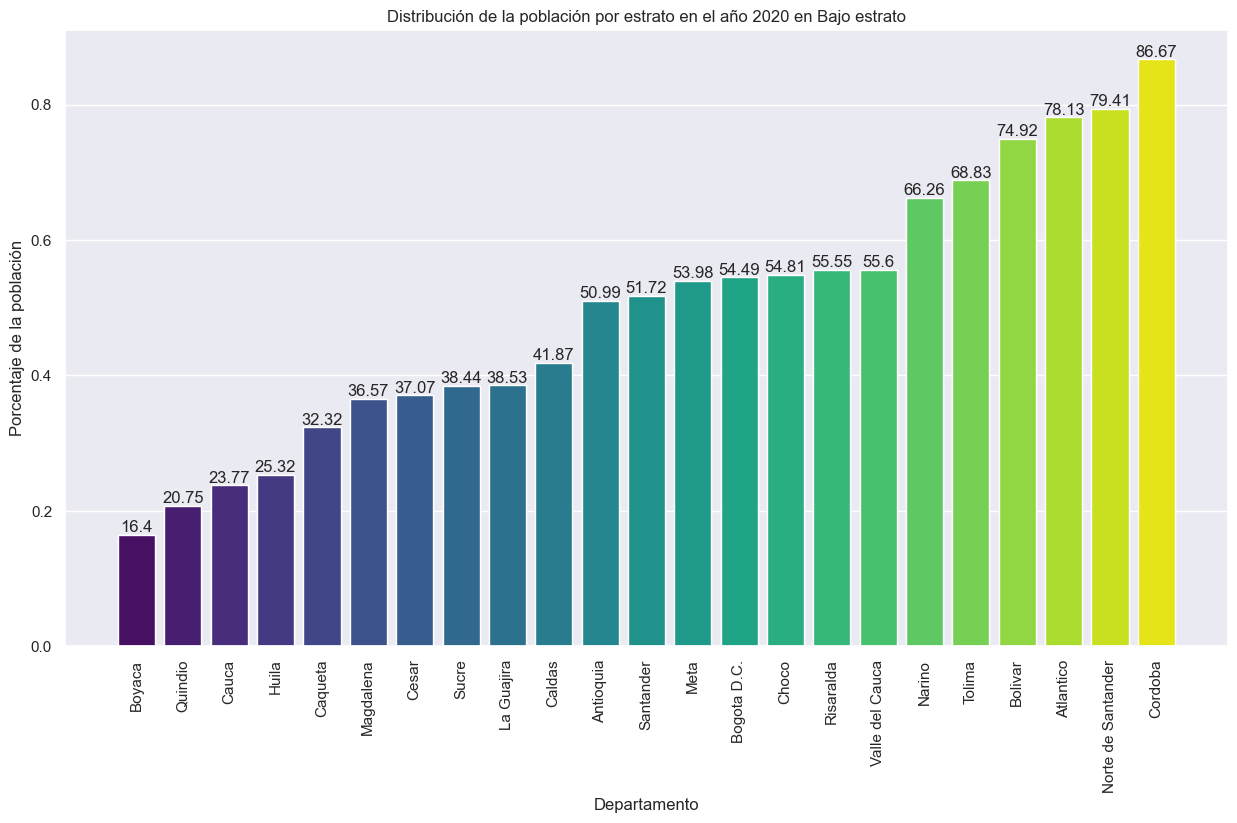

In [100]:
plot_stratum_distribution(df_per, 2020, 'Bajo', give_people)

In [265]:
# Stratum 1 and 2 by city
cbaj17_dep = df_per2017[df_per2017['estrato'].isin([1,2])].groupby('depto').size() / df_per2017.groupby('depto').size()
cbaj18_dep = df_per2018[df_per2018['estrato'].isin([1,2])].groupby('depto').size() / df_per2018.groupby('depto').size()
cbaj19_dep = df_per2019[df_per2019['estrato'].isin([1,2])].groupby('depto').size() / df_per2019.groupby('depto').size()
cbaj20_dep = df_per2020[df_per2020['estrato'].isin([1,2])].groupby('depto').size() / df_per2020.groupby('depto').size()

# Stratum 3 and 4 by city
cmed17_dep = df_per2017[df_per2017['estrato'].isin([3,4])].groupby('depto').size() / df_per2017.groupby('depto').size()
cmed18_dep = df_per2018[df_per2018['estrato'].isin([3,4])].groupby('depto').size() / df_per2018.groupby('depto').size()
cmed19_dep = df_per2019[df_per2019['estrato'].isin([3,4])].groupby('depto').size() / df_per2019.groupby('depto').size()
cmed20_dep = df_per2020[df_per2020['estrato'].isin([3,4])].groupby('depto').size() / df_per2020.groupby('depto').size()

# Stratum 5 and 6 by city
calt17_dep = df_per2017[df_per2017['estrato'].isin([5,6])].groupby('depto').size() / df_per2017.groupby('depto').size()
calt18_dep = df_per2018[df_per2018['estrato'].isin([5,6])].groupby('depto').size() / df_per2018.groupby('depto').size()
calt19_dep = df_per2019[df_per2019['estrato'].isin([5,6])].groupby('depto').size() / df_per2019.groupby('depto').size()
calt20_dep = df_per2020[df_per2020['estrato'].isin([5,6])].groupby('depto').size() / df_per2020.groupby('depto').size()

C:\Users\Acer\AppData\Local\Temp\ipykernel_25936\513862696.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation = 60)
C:\Users\Acer\AppData\Local\Temp\ipykernel_25936\513862696.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation = 60)
C:\Users\Acer\AppData\Local\Temp\ipykernel_25936\513862696.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation = 60)
C:\Users\Acer\AppData\Local\Temp\ipykernel_25936\513862696.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1,

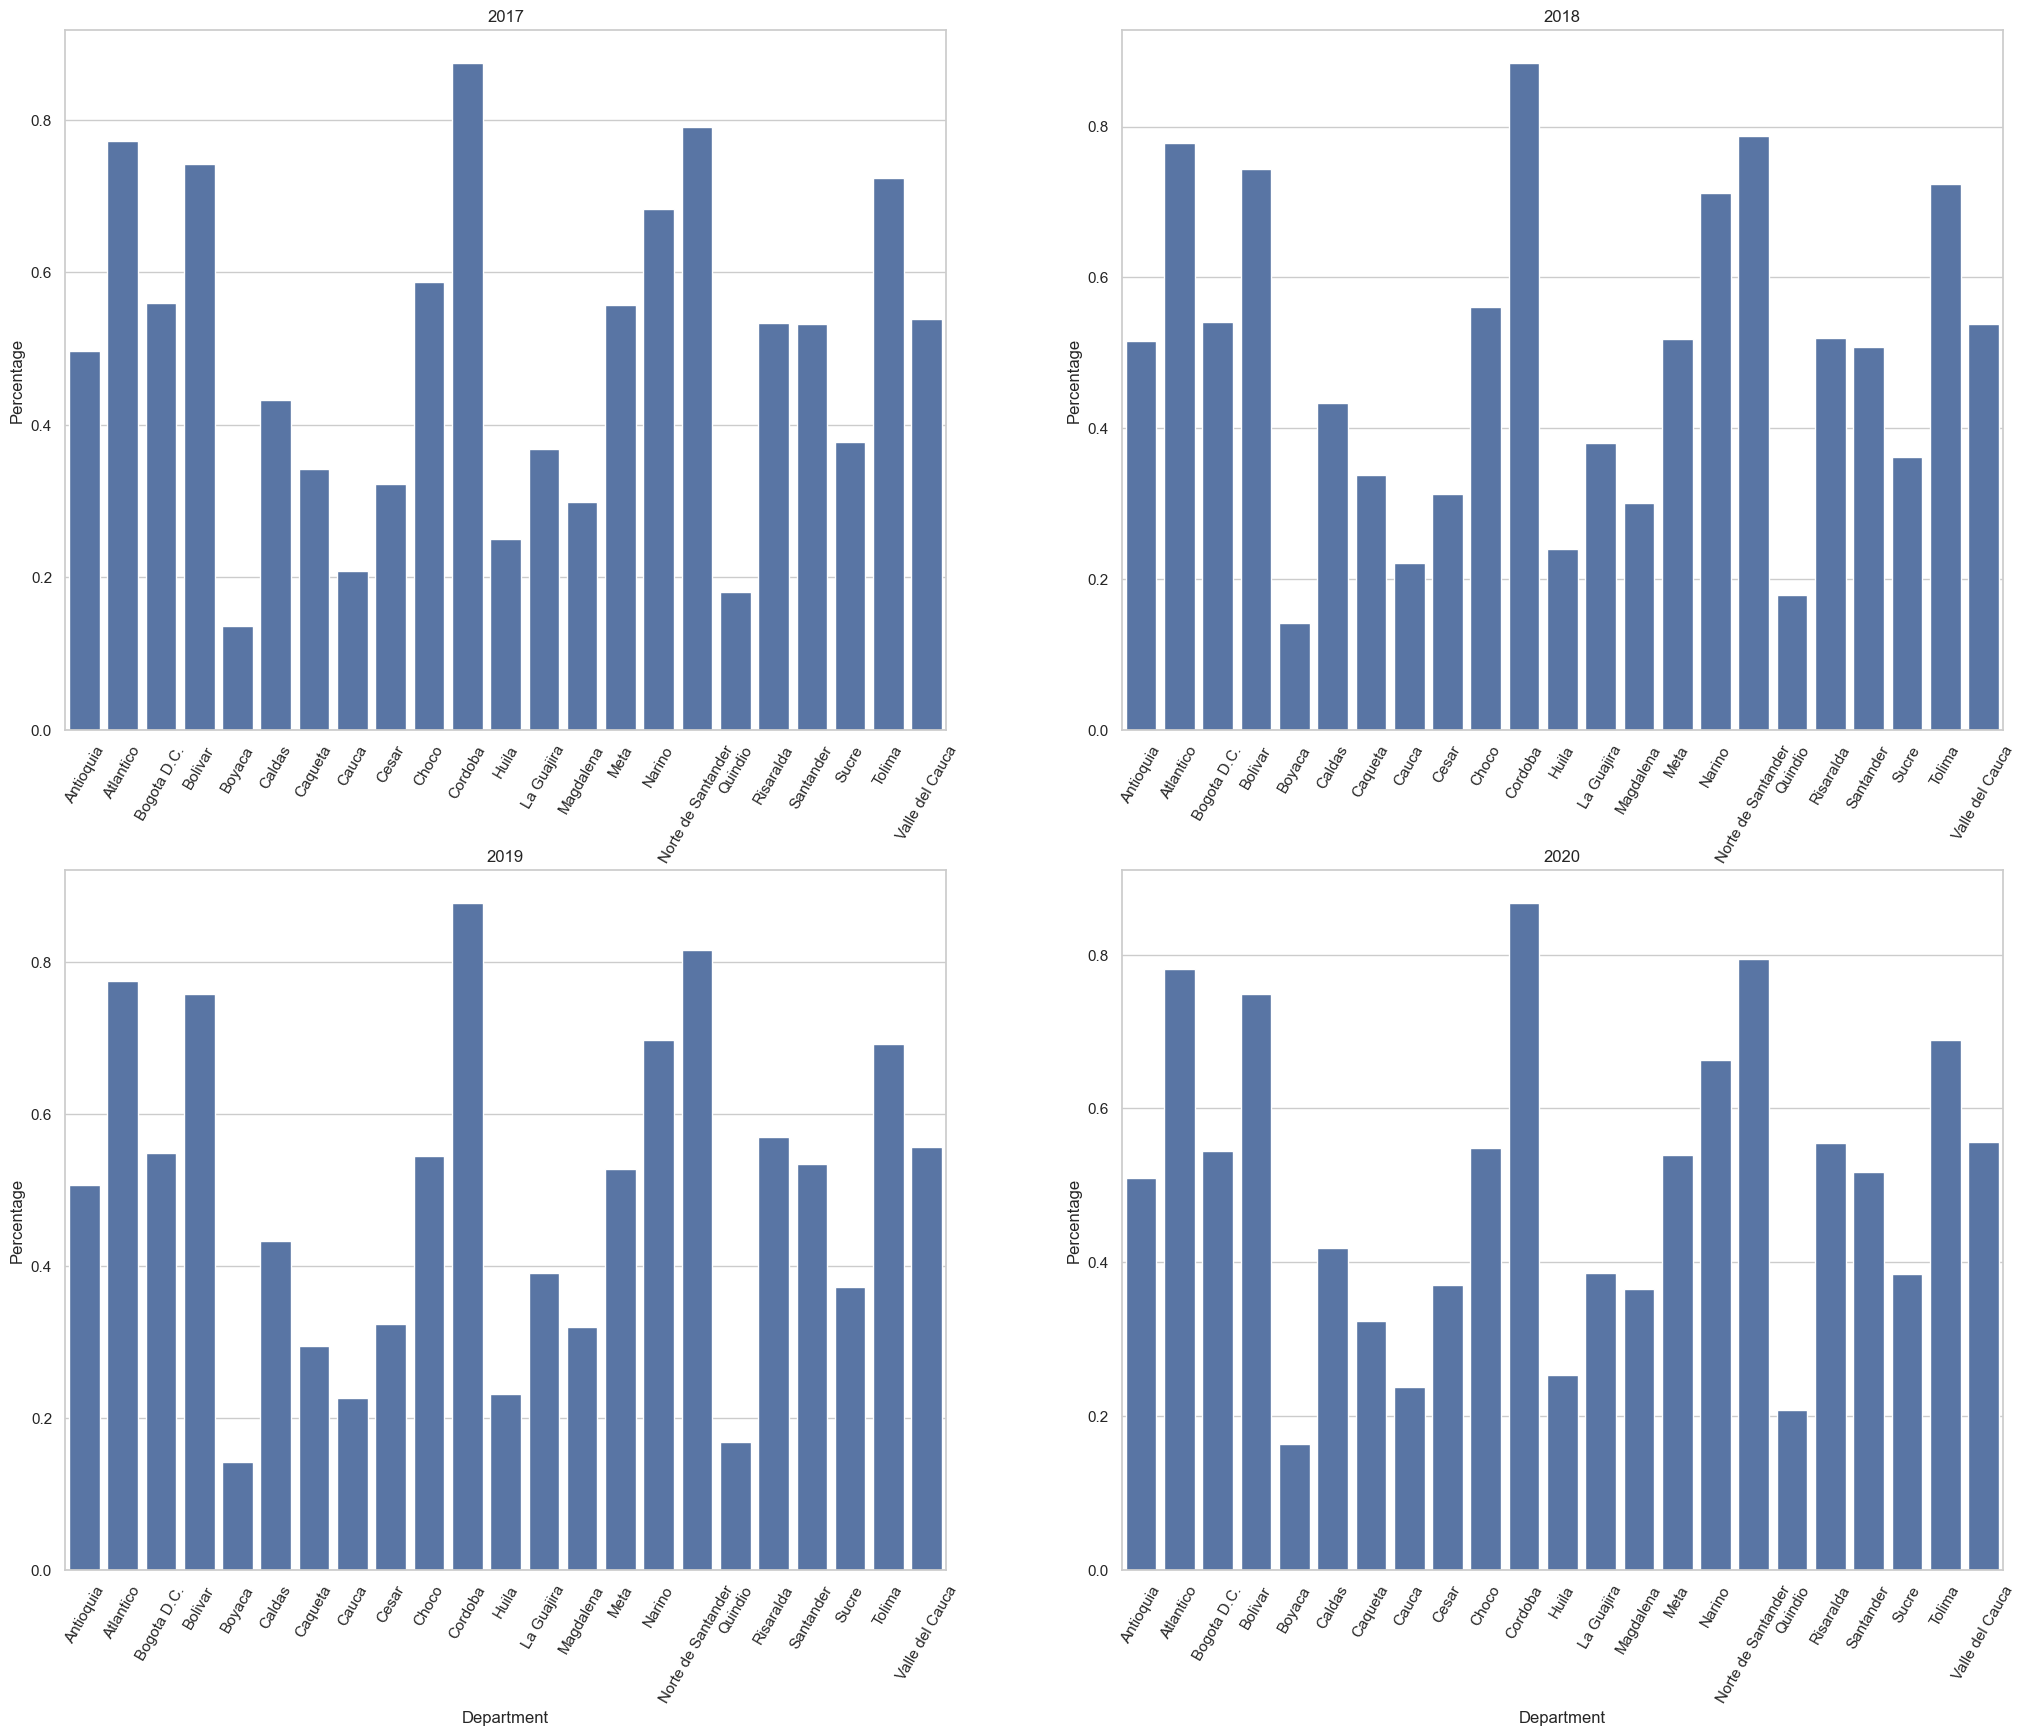

In [273]:
# Graph of the stratum 1 and 2 by city with seaborn by year in different subplots
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(25, 20))

sns.barplot(x = cbaj17_dep.index, y = cbaj17_dep, ax = axs[0, 0])
axs[0, 0].set_title('2017')
axs[0, 0].set_ylabel('Percentage')
axs[0, 0].set_xlabel('Department')
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation = 60)

sns.barplot(x = cbaj18_dep.index, y = cbaj18_dep, ax = axs[0, 1])
axs[0, 1].set_title('2018')
axs[0, 1].set_ylabel('Percentage')
axs[0, 1].set_xlabel('Department')
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation = 60)

sns.barplot(x = cbaj19_dep.index, y = cbaj19_dep, ax = axs[1, 0])
axs[1, 0].set_title('2019')
axs[1, 0].set_ylabel('Percentage')
axs[1, 0].set_xlabel('Department')
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation = 60)

sns.barplot(x = cbaj20_dep.index, y = cbaj20_dep, ax = axs[1, 1])
axs[1, 1].set_title('2020')
axs[1, 1].set_ylabel('Percentage')
axs[1, 1].set_xlabel('Department')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation = 60)

plt.savefig('../plots/stratum_1_2_by_city.png')
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_25936\618841025.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation = 60)
C:\Users\Acer\AppData\Local\Temp\ipykernel_25936\618841025.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation = 60)
C:\Users\Acer\AppData\Local\Temp\ipykernel_25936\618841025.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation = 60)
C:\Users\Acer\AppData\Local\Temp\ipykernel_25936\618841025.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 

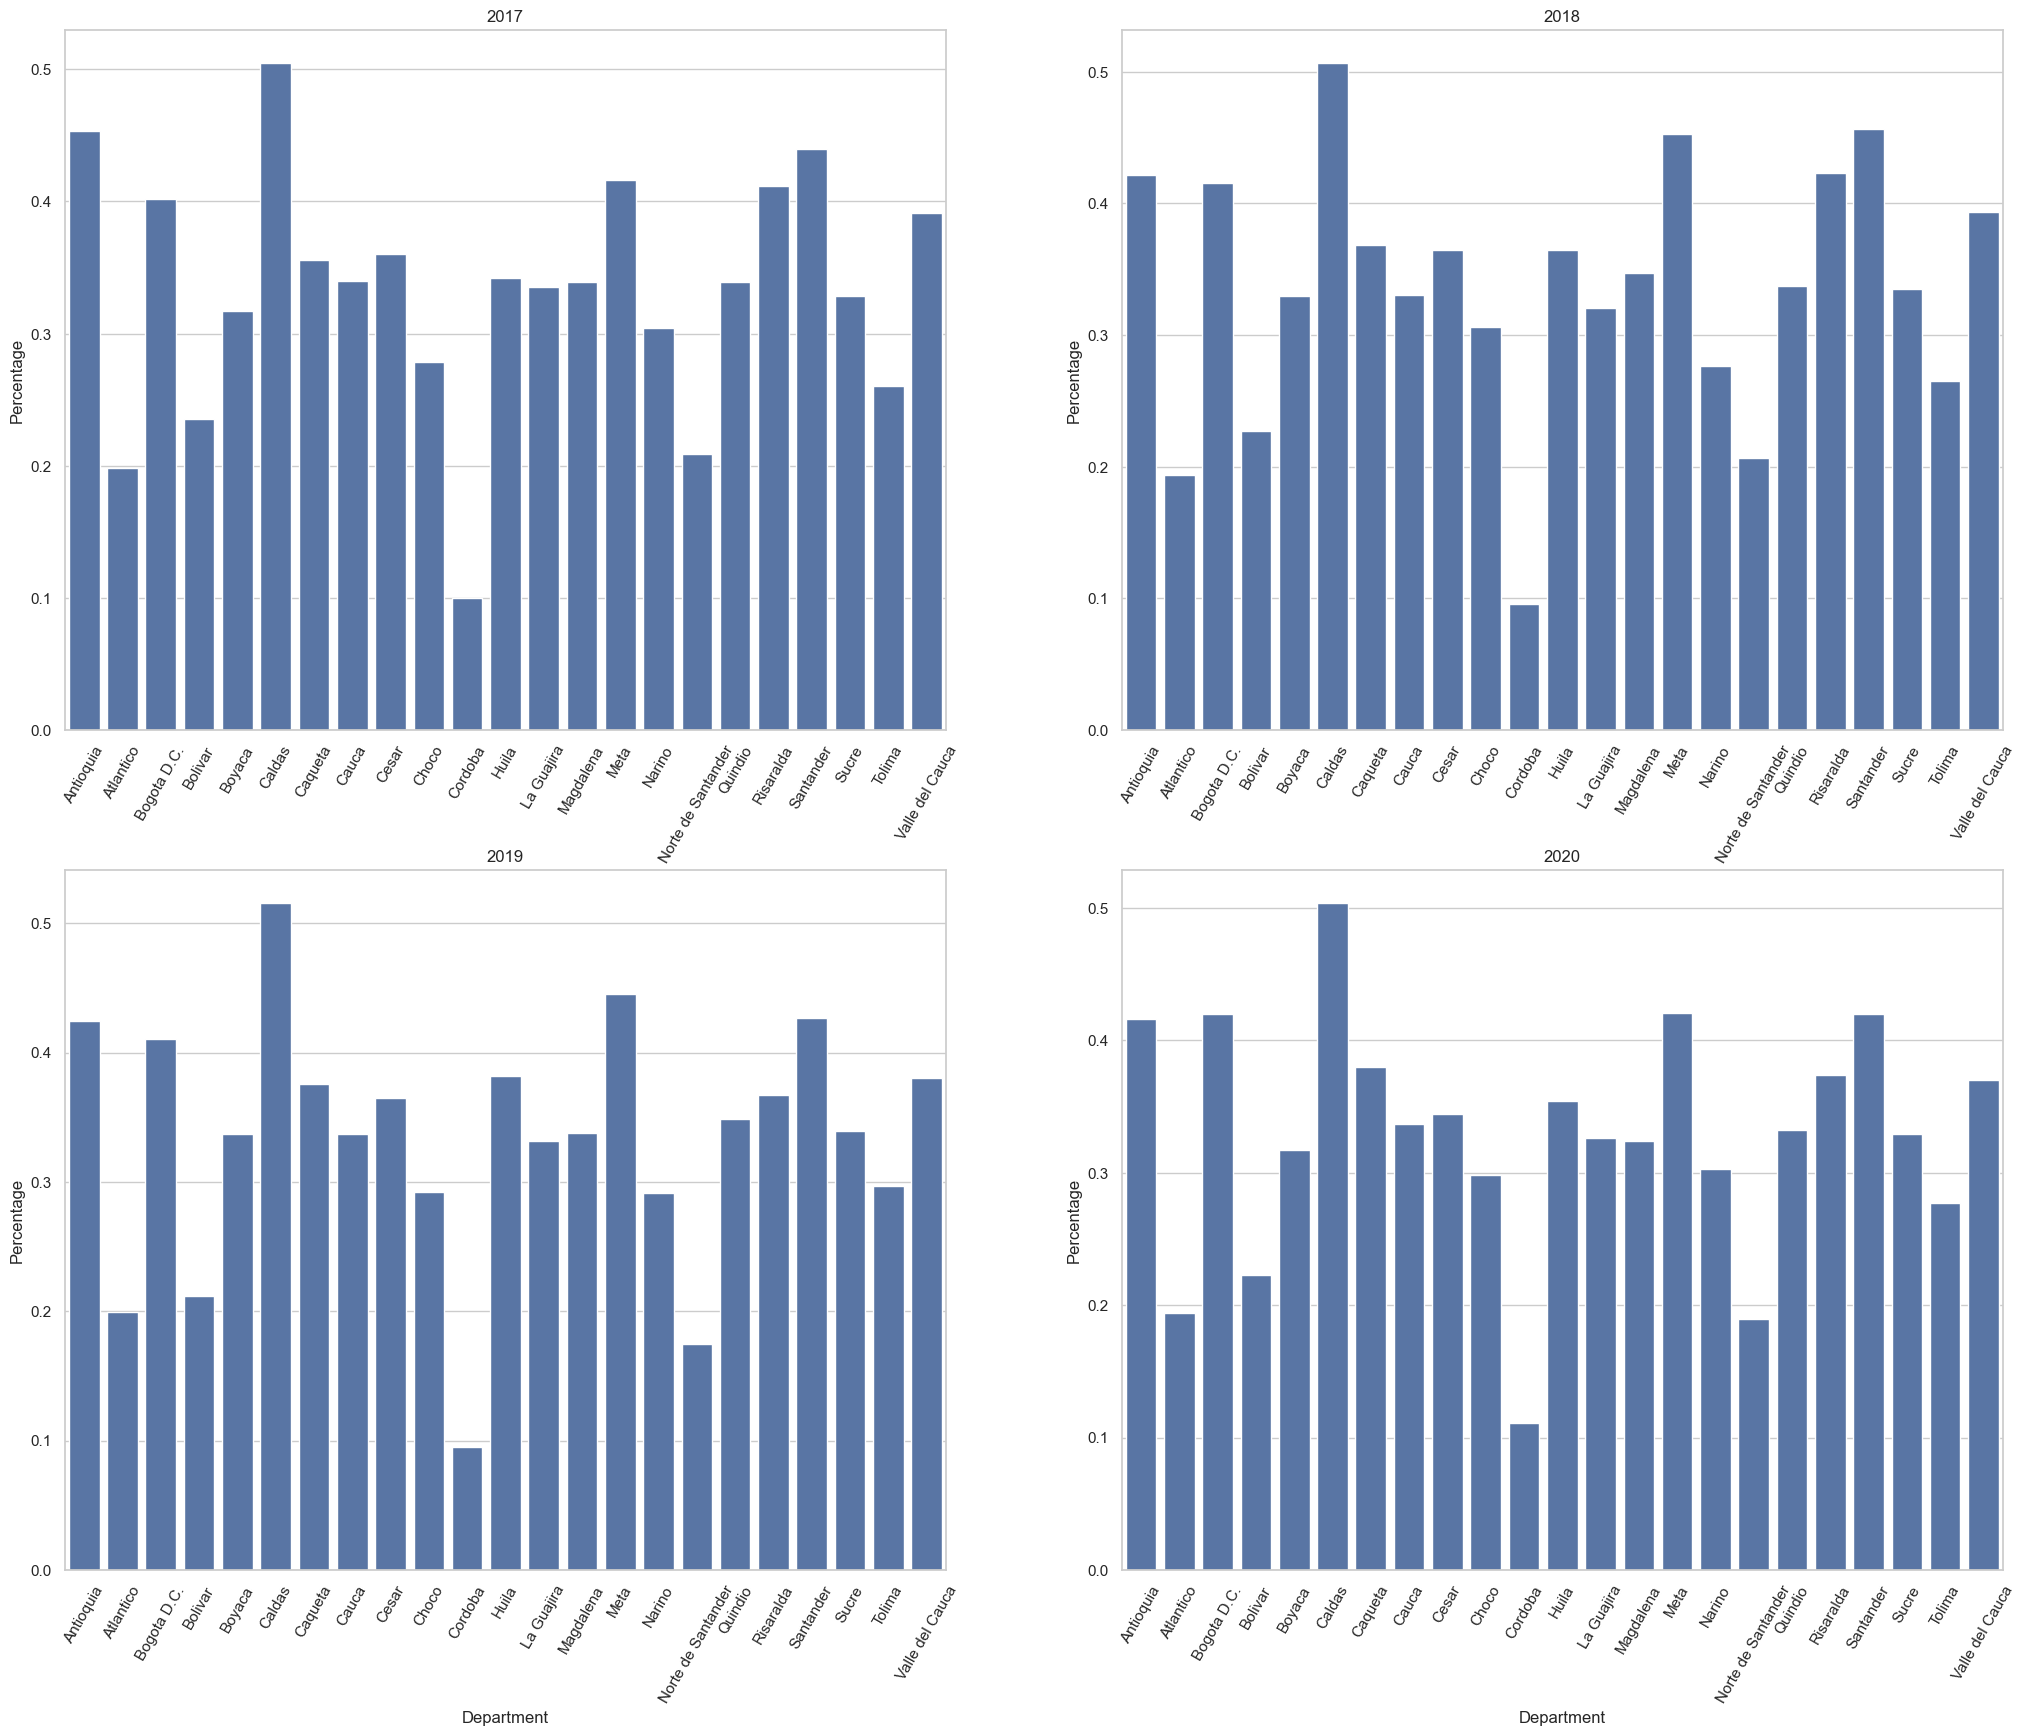

In [274]:
# Graph of the stratum 3 and 4 by city with seaborn by year in different subplots
fig, axs = plt.subplots(2, 2, figsize=(25, 20))

sns.barplot(x = cmed17_dep.index, y = cmed17_dep, ax = axs[0, 0])
axs[0, 0].set_title('2017')
axs[0, 0].set_ylabel('Percentage')
axs[0, 0].set_xlabel('Department')
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation = 60)

sns.barplot(x = cmed18_dep.index, y = cmed18_dep, ax = axs[0, 1])
axs[0, 1].set_title('2018')
axs[0, 1].set_ylabel('Percentage')
axs[0, 1].set_xlabel('Department')
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation = 60)

sns.barplot(x = cmed19_dep.index, y = cmed19_dep, ax = axs[1, 0])
axs[1, 0].set_title('2019')
axs[1, 0].set_ylabel('Percentage')
axs[1, 0].set_xlabel('Department')
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation = 60)

sns.barplot(x = cmed20_dep.index, y = cmed20_dep, ax = axs[1, 1])
axs[1, 1].set_title('2020')
axs[1, 1].set_ylabel('Percentage')
axs[1, 1].set_xlabel('Department')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation = 60)

plt.savefig('../plots/stratum_3_4_by_city.png')
plt.show()

In [ ]:
# Graph of the stratum 5 and 6 by city with seaborn by year in different subplots

fig, axs = plt.subplots(2, 2, figsize=(25, 20))

sns.barplot(x = calt17_dep.index, y = calt17_dep, ax = axs[0, 0])
axs[0, 0].set_title('2017')
axs[0, 0].set_ylabel('Percentage')
axs[0, 0].set_xlabel('Department')
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation = 60)

sns.barplot(x = calt18_dep.index, y = calt18_dep, ax = axs[0, 1])
axs[0, 1].set_title('2018')
axs[0, 1].set_ylabel('Percentage')
axs[0, 1].set_xlabel('Department')
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation = 60)

sns.barplot(x = calt19_dep.index, y = calt19_dep, ax = axs[1, 0])
axs[1, 0].set_title('2019')
axs[1, 0].set_ylabel('Percentage')
axs[1, 0].set_xlabel('Department')
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation = 60)

sns.barplot(x = calt20_dep.index, y = calt20_dep, ax = axs[1, 1])
axs[1, 1].set_title('2020')
axs[1, 1].set_ylabel('Percentage')
axs[1, 1].set_xlabel('Department')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation = 60)

plt.savefig('../plots/stratum_5_6_by_city.png')
plt.show()

## Regime

In [101]:
# Function to get a graph of the regime distribution

def plot_regime_distribution(df, year, typeRegime, give_people):

    df_year = give_people(df, año = year)

    if typeRegime == 'Contributivo':
        r_year = df_year[df_year['regimen'] == 'Contributivo'].groupby('depto').size() / df_year.groupby('depto').size()
    
    elif typeRegime == 'Especial':
        r_year = df_year[df_year['regimen'] == 'Especial'].groupby('depto').size() / df_year.groupby('depto').size()

    elif typeRegime == 'Subsidiado':
        r_year = df_year[df_year['regimen'] == 'Subsidiado'].groupby('depto').size() / df_year.groupby('depto').size()
    
    elif typeRegime == 'No sabe, no informa':
        r_year = df_year[df_year['regimen'] == 'No sabe, no informa'].groupby('depto').size() / df_year.groupby('depto').size()
    
    # Data in ascending order
    r_year = r_year.sort_values()
    # Plot the graph

    plt.figure(figsize=(15, 8))

    sns.barplot(x = r_year.index, y = r_year)

    # Add the value of the percentage over the bars
    for i in range(len(r_year)):
        plt.text(i, r_year[i], round(r_year[i]*100, 2), ha = 'center', va = 'bottom')

    plt.title('Distribución de la población por régimen en el año ' + str(year) + ' en ' + typeRegime + ' régimen')
    plt.xticks(rotation=90)
    plt.xlabel('Departamento')
    plt.ylabel('Porcentaje de la población')
    # Vary the color in the bars
    plt.bar(r_year.index, r_year, color = sns.color_palette('viridis', len(r_year)))
    plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_26860\410075344.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, r_year[i], round(r_year[i]*100, 2), ha = 'center', va = 'bottom')


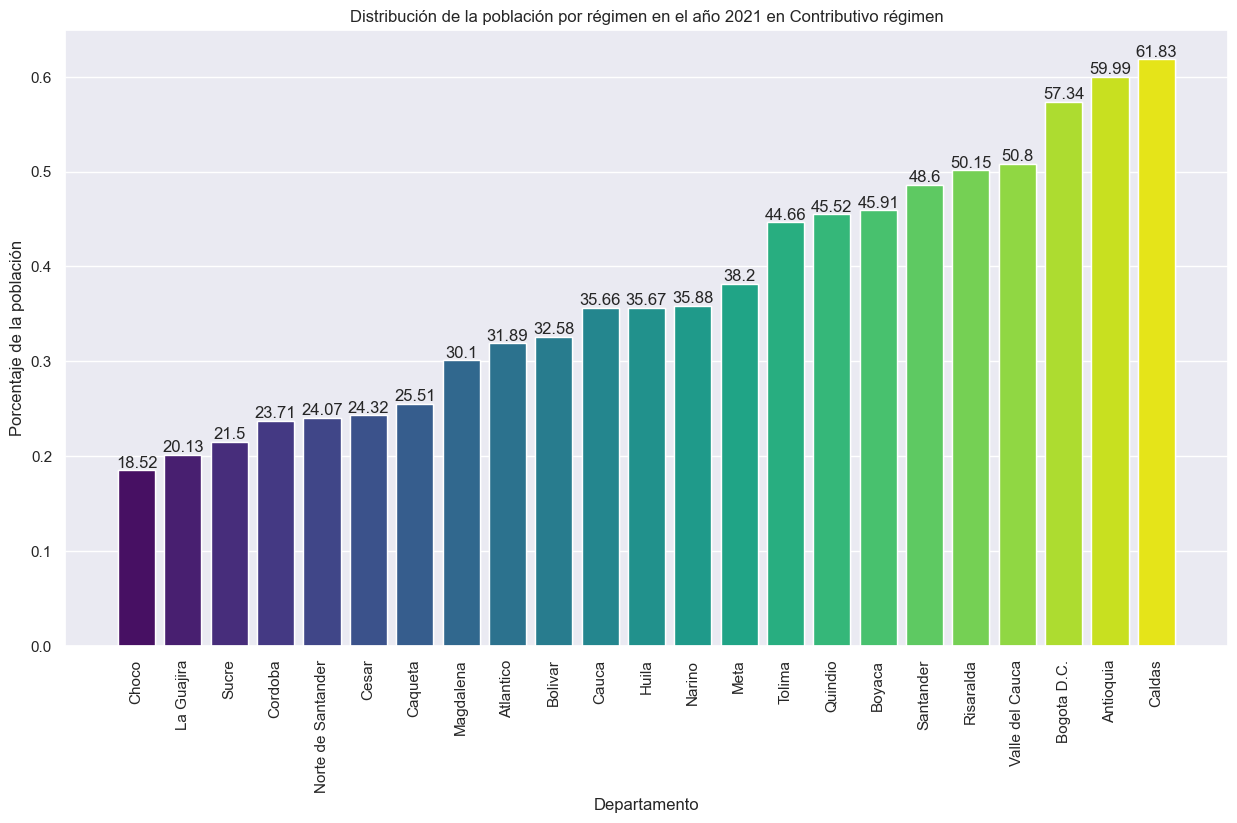

In [102]:
plot_regime_distribution(df_per, 2021, 'Contributivo', give_people)

## Education

In [103]:
# Function to get a graph of the education distribution

def plot_education_distribution(df, year, typeEducation, give_people):

    df_year = give_people(df, año = year)

    if typeEducation == 'Ninguno':
        e_year = df_year[df_year['educacion'] == 'Ninguno'].groupby('depto').size() / df_year.groupby('depto').size()

    elif typeEducation == 'Preescolar':
        e_year = df_year[df_year['educacion'] == 'Preescolar'].groupby('depto').size() / df_year.groupby('depto').size()
    
    elif typeEducation == 'Básica primaria':
        e_year = df_year[df_year['educacion'] == 'Básica primaria'].groupby('depto').size() / df_year.groupby('depto').size()

    elif typeEducation == 'Básica secundaria':
        e_year = df_year[df_year['educacion'] == 'Básica secundaria'].groupby('depto').size() / df_year.groupby('depto').size()
    
    elif typeEducation == 'Media':
        e_year = df_year[df_year['educacion'] == 'Media'].groupby('depto').size() / df_year.groupby('depto').size()

    elif typeEducation == 'Superior o Universitaria':
        e_year = df_year[df_year['educacion'] == 'Superior o Universitaria'].groupby('depto').size() / df_year.groupby('depto').size()

    elif typeEducation == 'No sabe, no informa':
        e_year = df_year[df_year['educacion'] == 'No sabe, no informa'].groupby('depto').size() / df_year.groupby('depto').size()

    # The data in ascending order
    e_year = e_year.sort_values()

    # Plot the graph

    plt.figure(figsize=(15, 8))

    sns.barplot(x = e_year.index, y = e_year)

    # Add the value of the percentage over the bars
    for i in range(len(e_year)):
        plt.text(i, e_year[i], round(e_year[i]*100, 2), ha = 'center', va = 'bottom')
    
    # Labels and title
    plt.title('Distribución de la población por nivel de educación en el año ' + str(year) + ' en ' + typeEducation + ' educación')
    plt.xticks(rotation=90)
    plt.xlabel('Departamento')
    plt.ylabel('Porcentaje de la población')
    # Vary the color in the bars
    plt.bar(e_year.index, e_year, color = sns.color_palette('viridis', len(e_year)))
    plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_26860\3082403829.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, e_year[i], round(e_year[i]*100, 2), ha = 'center', va = 'bottom')


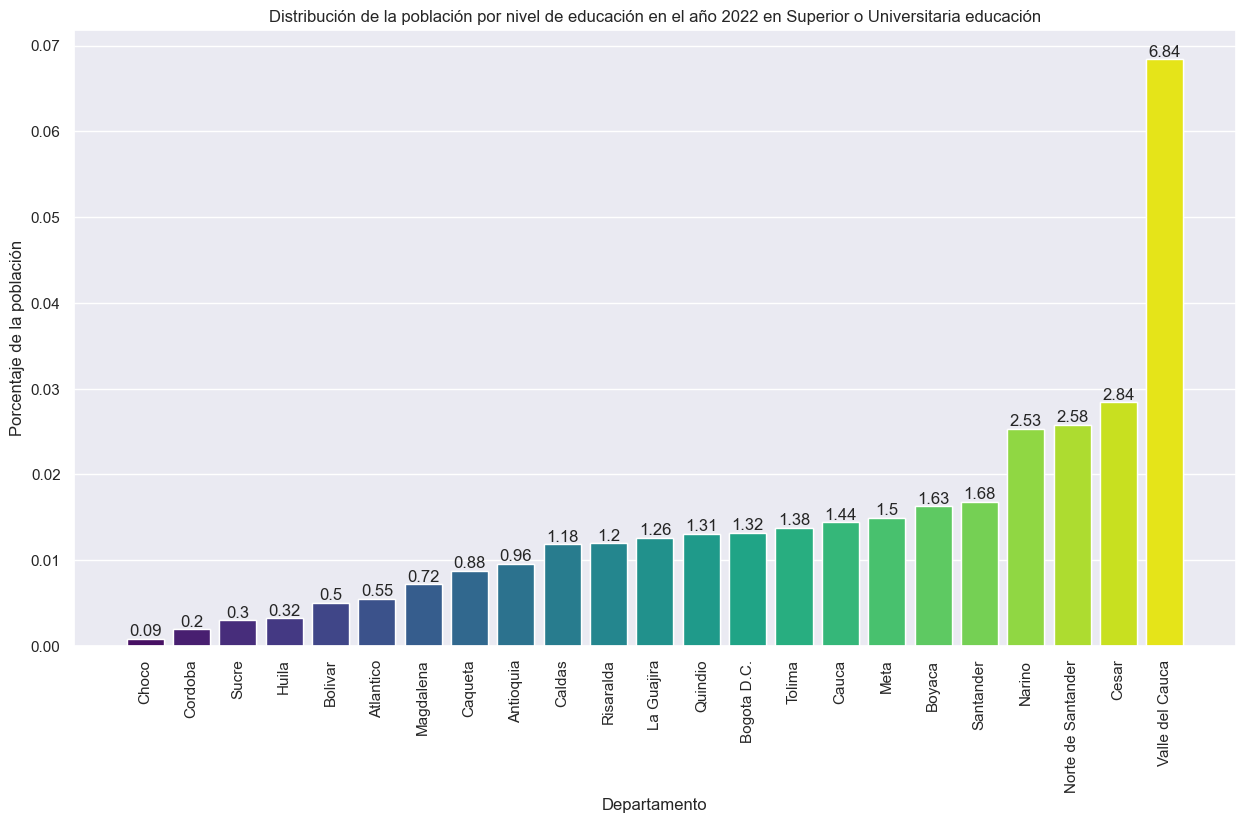

In [104]:
plot_education_distribution(df_per, 2022, 'Superior o Universitaria', give_people)

## Activity

In [105]:
# Function to get a graph of the activity distribution

def plot_activity_distribution(df, year, typeActivity, give_people):

    df_year = give_people(df, año = year)

    if typeActivity == 'Trabajando':
        a_year = df_year[df_year['actividad'] == 'Trabajando'].groupby('depto').size() / df_year.groupby('depto').size()

    elif typeActivity == 'Buscando trabajo':
        a_year = df_year[df_year['actividad'] == 'Buscando trabajo'].groupby('depto').size() / df_year.groupby('depto').size()

    elif typeActivity == 'Estudiando':
        a_year = df_year[df_year['actividad'] == 'Estudiando'].groupby('depto').size() / df_year.groupby('depto').size()

    elif typeActivity == 'Oficios del hogar':
        a_year = df_year[df_year['actividad'] == 'Oficios del hogar'].groupby('depto').size() / df_year.groupby('depto').size()

    elif typeActivity == 'Incapacitado permanente':
        a_year = df_year[df_year['actividad'] == 'Incapacitado permanente'].groupby('depto').size() / df_year.groupby('depto').size()

    elif typeActivity == 'Otra actividad':
        a_year = df_year[df_year['actividad'] == 'Otra actividad'].groupby('depto').size() / df_year.groupby('depto').size()

    # The data in ascending order
    a_year = a_year.sort_values()

    # Plot the graph

    plt.figure(figsize=(15, 8))

    sns.barplot(x = a_year.index, y = a_year)

    # Add the value of the percentage over the bars
    for i in range(len(a_year)):
        plt.text(i, a_year[i], round(a_year[i]*100, 2), ha = 'center', va = 'bottom')

    # Labels and title
    plt.title('Distribución de la población por actividad en el año ' + str(year) + ' en ' + typeActivity + ' actividad')
    plt.xticks(rotation=90)
    plt.xlabel('Departamento')
    plt.ylabel('Porcentaje de la población')
    # Vary the color in the bars
    plt.bar(a_year.index, a_year, color = sns.color_palette('viridis', len(a_year)))
    plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_26860\3958144043.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, a_year[i], round(a_year[i]*100, 2), ha = 'center', va = 'bottom')


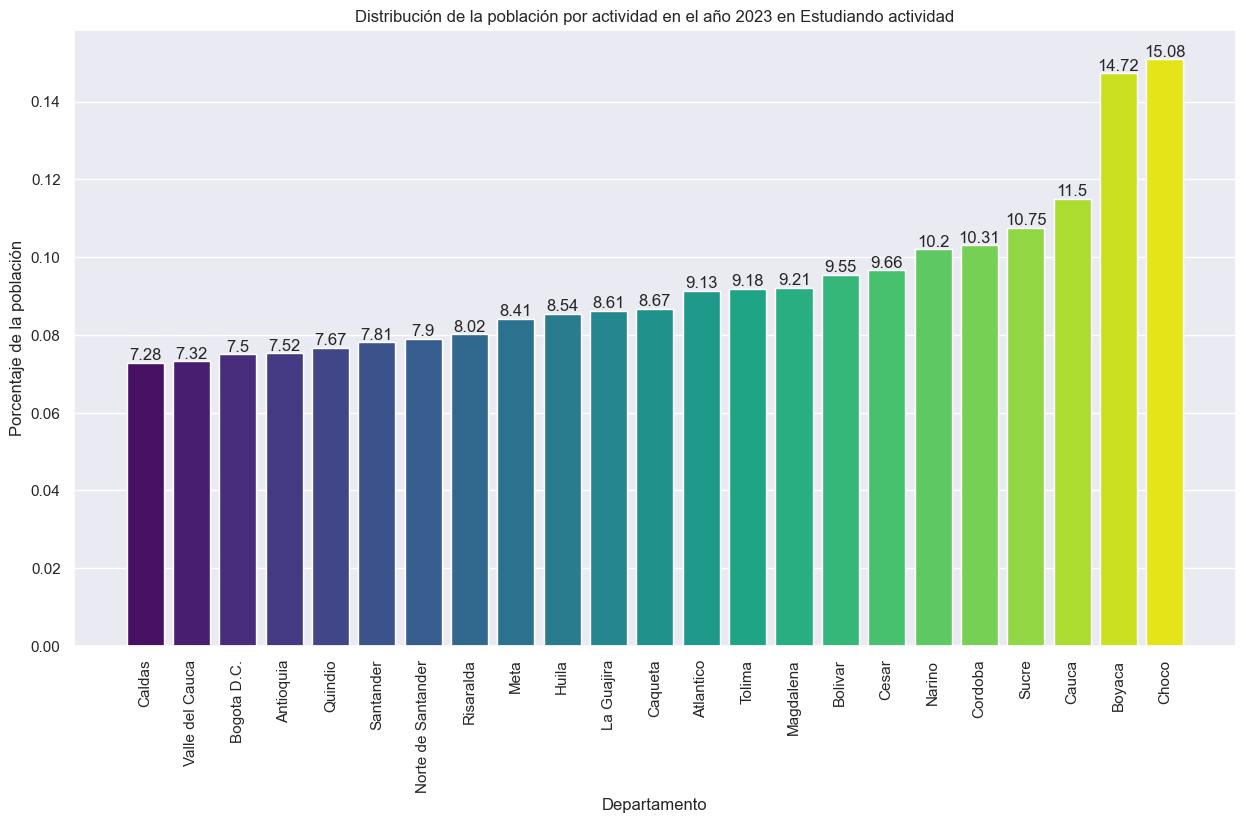

In [106]:
plot_activity_distribution(df_per, 2023, 'Estudiando', give_people)

In [124]:
df_hog16 = pd.read_csv('../datasets/Hogares_2016.txt', sep = '	')
df_hog17 = pd.read_csv('../datasets/Hogares_2017.csv', sep = ';')
df_hog18 = pd.read_csv('../datasets/Hogares_2018.csv', sep = ';')
df_hog19 = pd.read_csv('../datasets/Hogares_2019.csv', sep = ';')
df_hog20 = pd.read_csv('../datasets/Hogares_2020.csv', sep = ';')
df_hog21 = pd.read_csv('../datasets/Hogares_2021.csv', sep = ',')
df_hog22 = pd.read_csv('../datasets/Hogares_2022.csv', sep = ',')

In [126]:
def filter_dataset_home(df, deptos, year, remove_accents):
    
    # Apply the title case to the columns
    df.columns = df.columns.str.lower()

    # Check for the presence of the department column
    if 'depto' in df.columns:
        df['depto'] = df['depto'].apply(lambda x: [depto[1] for depto in deptos if depto[0] == x][0])
    elif 'dpto' in df.columns:
        df['depto'] = df['dpto'].apply(lambda x: [depto[1] for depto in deptos if depto[0] == x][0])

    # Remove rows where depto is None
    df = df.dropna(subset=['depto'])
    
    # Remove accents from the columns
    df['depto'] = df['depto'].apply(remove_accents)
    df['dominio'] = df['dominio'].apply(remove_accents)
    
    # Applying the title case to the dominio column
    df['dominio'] = df['dominio'].str.title()
    
    # Delete 'Resto Urbano' and 'Rural' from the dominio column
    df = df[df['dominio'] != 'Resto Urbano']
    df = df[df['dominio'] != 'Rural']
    
    # Add the year column
    df['año'] = year
    print(year)

    # Clean data
    if df['ingtotug'].dtype != float:
        df["ingtotug"] = [x.replace(",", ".") for x in df["ingtotug"]]
    df["ingtotug"] = df["ingtotug"].astype(float)
    df['vivienda'] = df['p5090']
    
    df = df[['depto', 'dominio', 'año', 'ingtotug', 'vivienda', 'pobre', 'indigente']]
    return df

In [127]:
def filter_datasets_home(dfs, deptos, years, remove_accents, filter_dataset_people):
    df_16, df_17, df_18, df_19, df_20, df_21, df_22 = [filter_dataset_home(dfs[i], deptos, years[i], remove_accents) for i in range(len(dfs))]
    df = pd.concat([df_16, df_17, df_18, df_19, df_20, df_21, df_22])
    return df

In [ ]:
def replace_dataset_home(df):
    df['regimen'] = df['regimen'].replace({'1': 'Contributivo', '2': 'Especial', '3': 'Subsidiado', '9': 'No sabe, no informa'})
    df['regimen'] = df['regimen'].replace({1.0: 'Contributivo', 2.0: 'Especial', 3.0: 'Subsidiado', 9.0: 'No sabe, no informa'})
    df['actividad'] = df['actividad'].replace({'1': 'Trabajando', '2': 'Buscando trabajo', '3': 'Estudiando', '4': 'Oficios del hogar', '5': 'Incapacitado permanente', '6': 'Otra actividad'})
    df['actividad'] = df['actividad'].replace({1.0: 'Trabajando', 2.0: 'Buscando trabajo', 3.0: 'Estudiando', 4.0: 'Oficios del hogar', 5.0: 'Incapacitado permanente', 6.0: 'Otra actividad'})
    df['educacion'] = df['educacion'].replace({'1': 'Ninguno', '2': 'Preescolar', '3': 'Básica primaria', '4': 'Básica secundaria', '5': 'Media', '6': 'Superior o Universitaria', '9': 'No sabe, no informa'})
    df['educacion'] = df['educacion'].replace({1.0: 'Ninguno', 2.0: 'Preescolar', 3.0: 'Básica primaria', 4.0: 'Básica secundaria', 5.0: 'Media', 6.0: 'Superior o Universitaria', 9.0: 'No sabe, no informa'})
    return df


In [128]:
dfs = [df_hog16, df_hog17, df_hog18, df_hog19, df_hog20, df_hog21, df_hog22]
years = list(range(2016,2023))

In [129]:
df_hog = filter_datasets_home(dfs, deptos, years, remove_accents, filter_dataset_people)

ValueError: could not convert string to float: ' '

In [108]:
# Prepare correlation matrix
cbaj = df_per[df_per['estrato'].isin([1,2])].groupby('año').size() / df_per.groupby('año').size()
cmed = df_per[df_per['estrato'].isin([3,4])].groupby('año').size() / df_per.groupby('año').size()
calt = df_per[df_per['estrato'].isin([5,6])].groupby('año').size() / df_per.groupby('año').size()

rcon = df_per[df_per['regimen'] == 'Contributivo'].groupby('año').size() / df_per.groupby('año').size()
res = df_per[df_per['regimen'] == 'Especial'].groupby('año').size() / df_per.groupby('año').size()
rsub = df_per[df_per['regimen'] == 'Subsidiado'].groupby('año').size() / df_per.groupby('año').size()

epre = df_per[df_per['educacion'] == 'Preescolar'].groupby('año').size() / df_per.groupby('año').size()
ebap = df_per[df_per['educacion'] == 'Básica primaria'].groupby('año').size() / df_per.groupby('año').size()
ebas = df_per[df_per['educacion'] == 'Básica secundaria'].groupby('año').size() / df_per.groupby('año').size()
emed = df_per[df_per['educacion'] == 'Media'].groupby('año').size() / df_per.groupby('año').size()
esup = df_per[df_per['educacion'] == 'Superior o Universitaria'].groupby('año').size() / df_per.groupby('año').size()

etrab = df_per[df_per['actividad'] == 'Trabajando'].groupby('año').size() / df_per.groupby('año').size()
ebtra = df_per[df_per['actividad'] == 'Buscando trabajo'].groupby('año').size() / df_per.groupby('año').size()
eest = df_per[df_per['actividad'] == 'Estudiando'].groupby('año').size() / df_per.groupby('año').size()
eofho = df_per[df_per['actividad'] == 'Oficios del hogar'].groupby('año').size() / df_per.groupby('año').size()
einc = df_per[df_per['actividad'] == 'Incapacitado permanente'].groupby('año').size() / df_per.groupby('año').size()

df_matrix = pd.DataFrame({'Estrato bajo': cbaj.values, 'Estrato medio': cmed.values, 'Estrato alto': calt.values, 'Régimen Contributivo': rcon.values, 'Especial': res.values, 'Régimen Subsidiado': rsub.values, 'Preescolar': epre.values, 'Básica primaria': ebap.values, 'Básica secundaria': ebas.values, 'Media': emed.values, 'Superior o Universitaria': esup.values, 'Trabajando': etrab.values, 'Buscando trabajo': ebtra.values, 'Estudiando': eest.values, 'Oficios del hogar': eofho.values, 'Incapacitado permanente': einc.values})
df_matrix

,Estrato bajo,Estrato medio,Estrato alto,Régimen Contributivo,Especial,Régimen Subsidiado,Preescolar,Básica primaria,Básica secundaria,Media,Superior o Universitaria,Trabajando,Buscando trabajo,Estudiando,Oficios del hogar,Incapacitado permanente
0,0.496908,0.333743,0.169348,0.407074,0.040535,0.321788,0.028824,0.227569,0.175075,0.222913,0.261006,0.386314,0.025445,0.137655,0.184092,0.011626
1,0.496690,0.335432,0.167878,0.403262,0.040307,0.327006,0.028542,0.221942,0.171177,0.231112,0.265103,0.388090,0.027022,0.134839,0.187914,0.013027
2,0.502371,0.333037,0.164592,0.396660,0.039506,0.329776,0.028615,0.216357,0.169805,0.236856,0.267926,0.378721,0.030252,0.135194,0.192187,0.013272
3,0.505238,0.328477,0.166285,0.429383,0.041470,0.427750,0.024374,0.213185,0.160506,0.247527,0.257235,0.286022,0.041745,0.129730,0.258221,0.019198
4,NaN,NaN,NaN,0.378937,0.037860,0.358347,0.023689,0.213387,0.164319,0.252235,0.266689,0.349575,0.039859,0.129952,0.217464,0.018251
5,NaN,NaN,NaN,0.457131,0.039138,0.445363,0.026667,0.211719,0.149968,0.238877,0.014756,0.382522,0.043693,0.092530,0.196601,0.021186
6,NaN,NaN,NaN,0.458853,0.043077,0.453714,0.026784,0.209559,0.147588,0.241397,0.017828,0.387656,0.038912,0.092194,0.197351,0.019299


In [110]:
# Prepare correlation matrix
cbaj = df_per[df_per['estrato'].isin([1,2])].groupby('dominio').size() / df_per.groupby('dominio').size()
cmed = df_per[df_per['estrato'].isin([3,4])].groupby('dominio').size() / df_per.groupby('dominio').size()
calt = df_per[df_per['estrato'].isin([5,6])].groupby('dominio').size() / df_per.groupby('dominio').size()

rcon = df_per[df_per['regimen'] == 'Contributivo'].groupby('dominio').size() / df_per.groupby('dominio').size()
res = df_per[df_per['regimen'] == 'Especial'].groupby('dominio').size() / df_per.groupby('dominio').size()
rsub = df_per[df_per['regimen'] == 'Subsidiado'].groupby('dominio').size() / df_per.groupby('dominio').size()

epre = df_per[df_per['educacion'] == 'Preescolar'].groupby('dominio').size() / df_per.groupby('dominio').size()
ebap = df_per[df_per['educacion'] == 'Básica primaria'].groupby('dominio').size() / df_per.groupby('dominio').size()
ebas = df_per[df_per['educacion'] == 'Básica secundaria'].groupby('dominio').size() / df_per.groupby('dominio').size()
emed = df_per[df_per['educacion'] == 'Media'].groupby('dominio').size() / df_per.groupby('dominio').size()
esup = df_per[df_per['educacion'] == 'Superior o Universitaria'].groupby('dominio').size() / df_per.groupby('dominio').size()

etrab = df_per[df_per['actividad'] == 'Trabajando'].groupby('dominio').size() / df_per.groupby('dominio').size()
ebtra = df_per[df_per['actividad'] == 'Buscando trabajo'].groupby('dominio').size() / df_per.groupby('dominio').size()
eest = df_per[df_per['actividad'] == 'Estudiando'].groupby('dominio').size() / df_per.groupby('dominio').size()
eofho = df_per[df_per['actividad'] == 'Oficios del hogar'].groupby('dominio').size() / df_per.groupby('dominio').size()
einc = df_per[df_per['actividad'] == 'Incapacitado permanente'].groupby('dominio').size() / df_per.groupby('dominio').size()

df_matrix = pd.DataFrame({'Estrato bajo': cbaj.values, 'Estrato medio': cmed.values, 'Estrato alto': calt.values, 'Régimen Contributivo': rcon.values, 'Especial': res.values, 'Régimen Subsidiado': rsub.values, 'Preescolar': epre.values, 'Básica primaria': ebap.values, 'Básica secundaria': ebas.values, 'Media': emed.values, 'Superior o Universitaria': esup.values, 'Trabajando': etrab.values, 'Buscando trabajo': ebtra.values, 'Estudiando': eest.values, 'Oficios del hogar': eofho.values, 'Incapacitado permanente': einc.values})
df_matrix

,Estrato bajo,Estrato medio,Estrato alto,Régimen Contributivo,Especial,Régimen Subsidiado,Preescolar,Básica primaria,Básica secundaria,Media,Superior o Universitaria,Trabajando,Buscando trabajo,Estudiando,Oficios del hogar,Incapacitado permanente
0,0.106284,0.195939,0.275254,0.490049,0.055633,0.297551,0.018057,0.224127,0.174614,0.253348,0.184324,0.354477,0.038107,0.108233,0.236503,0.038250
1,0.476312,0.120501,0.016616,0.371376,0.022432,0.424117,0.032887,0.199630,0.164855,0.276090,0.182060,0.358296,0.022483,0.121258,0.224605,0.019716
2,0.335178,0.251620,0.023841,0.635769,0.026158,0.162309,0.030095,0.191449,0.147852,0.252633,0.230172,0.418272,0.040439,0.108144,0.157274,0.008342
3,0.293892,0.244955,0.023222,0.530969,0.039304,0.274957,0.022473,0.230862,0.144582,0.262008,0.173927,0.406911,0.020747,0.106433,0.172618,0.007592
4,0.308397,0.216299,0.038867,0.557616,0.018782,0.265123,0.024044,0.213618,0.173695,0.276383,0.164834,0.398919,0.025046,0.098150,0.199505,0.016251
5,0.420243,0.125986,0.015514,0.365952,0.034263,0.445149,0.040497,0.195366,0.167554,0.241845,0.196581,0.338958,0.033319,0.127250,0.225154,0.026916
6,0.435905,0.106356,0.004693,0.280823,0.034114,0.477462,0.020887,0.258338,0.186447,0.237879,0.134302,0.326772,0.043583,0.113036,0.203855,0.007950
7,0.186837,0.212443,0.175631,0.271243,0.063172,0.505613,0.020894,0.266170,0.172531,0.193514,0.168649,0.349890,0.041775,0.129193,0.225565,0.011402
8,0.430973,0.167454,0.010851,0.475282,0.064444,0.302944,0.022065,0.225488,0.163212,0.242465,0.206681,0.348442,0.059091,0.123324,0.226268,0.015609
9,0.233826,0.276446,0.034377,0.652791,0.043255,0.192982,0.022987,0.210569,0.158149,0.244262,0.200631,0.387036,0.032167,0.098346,0.213622,0.014136


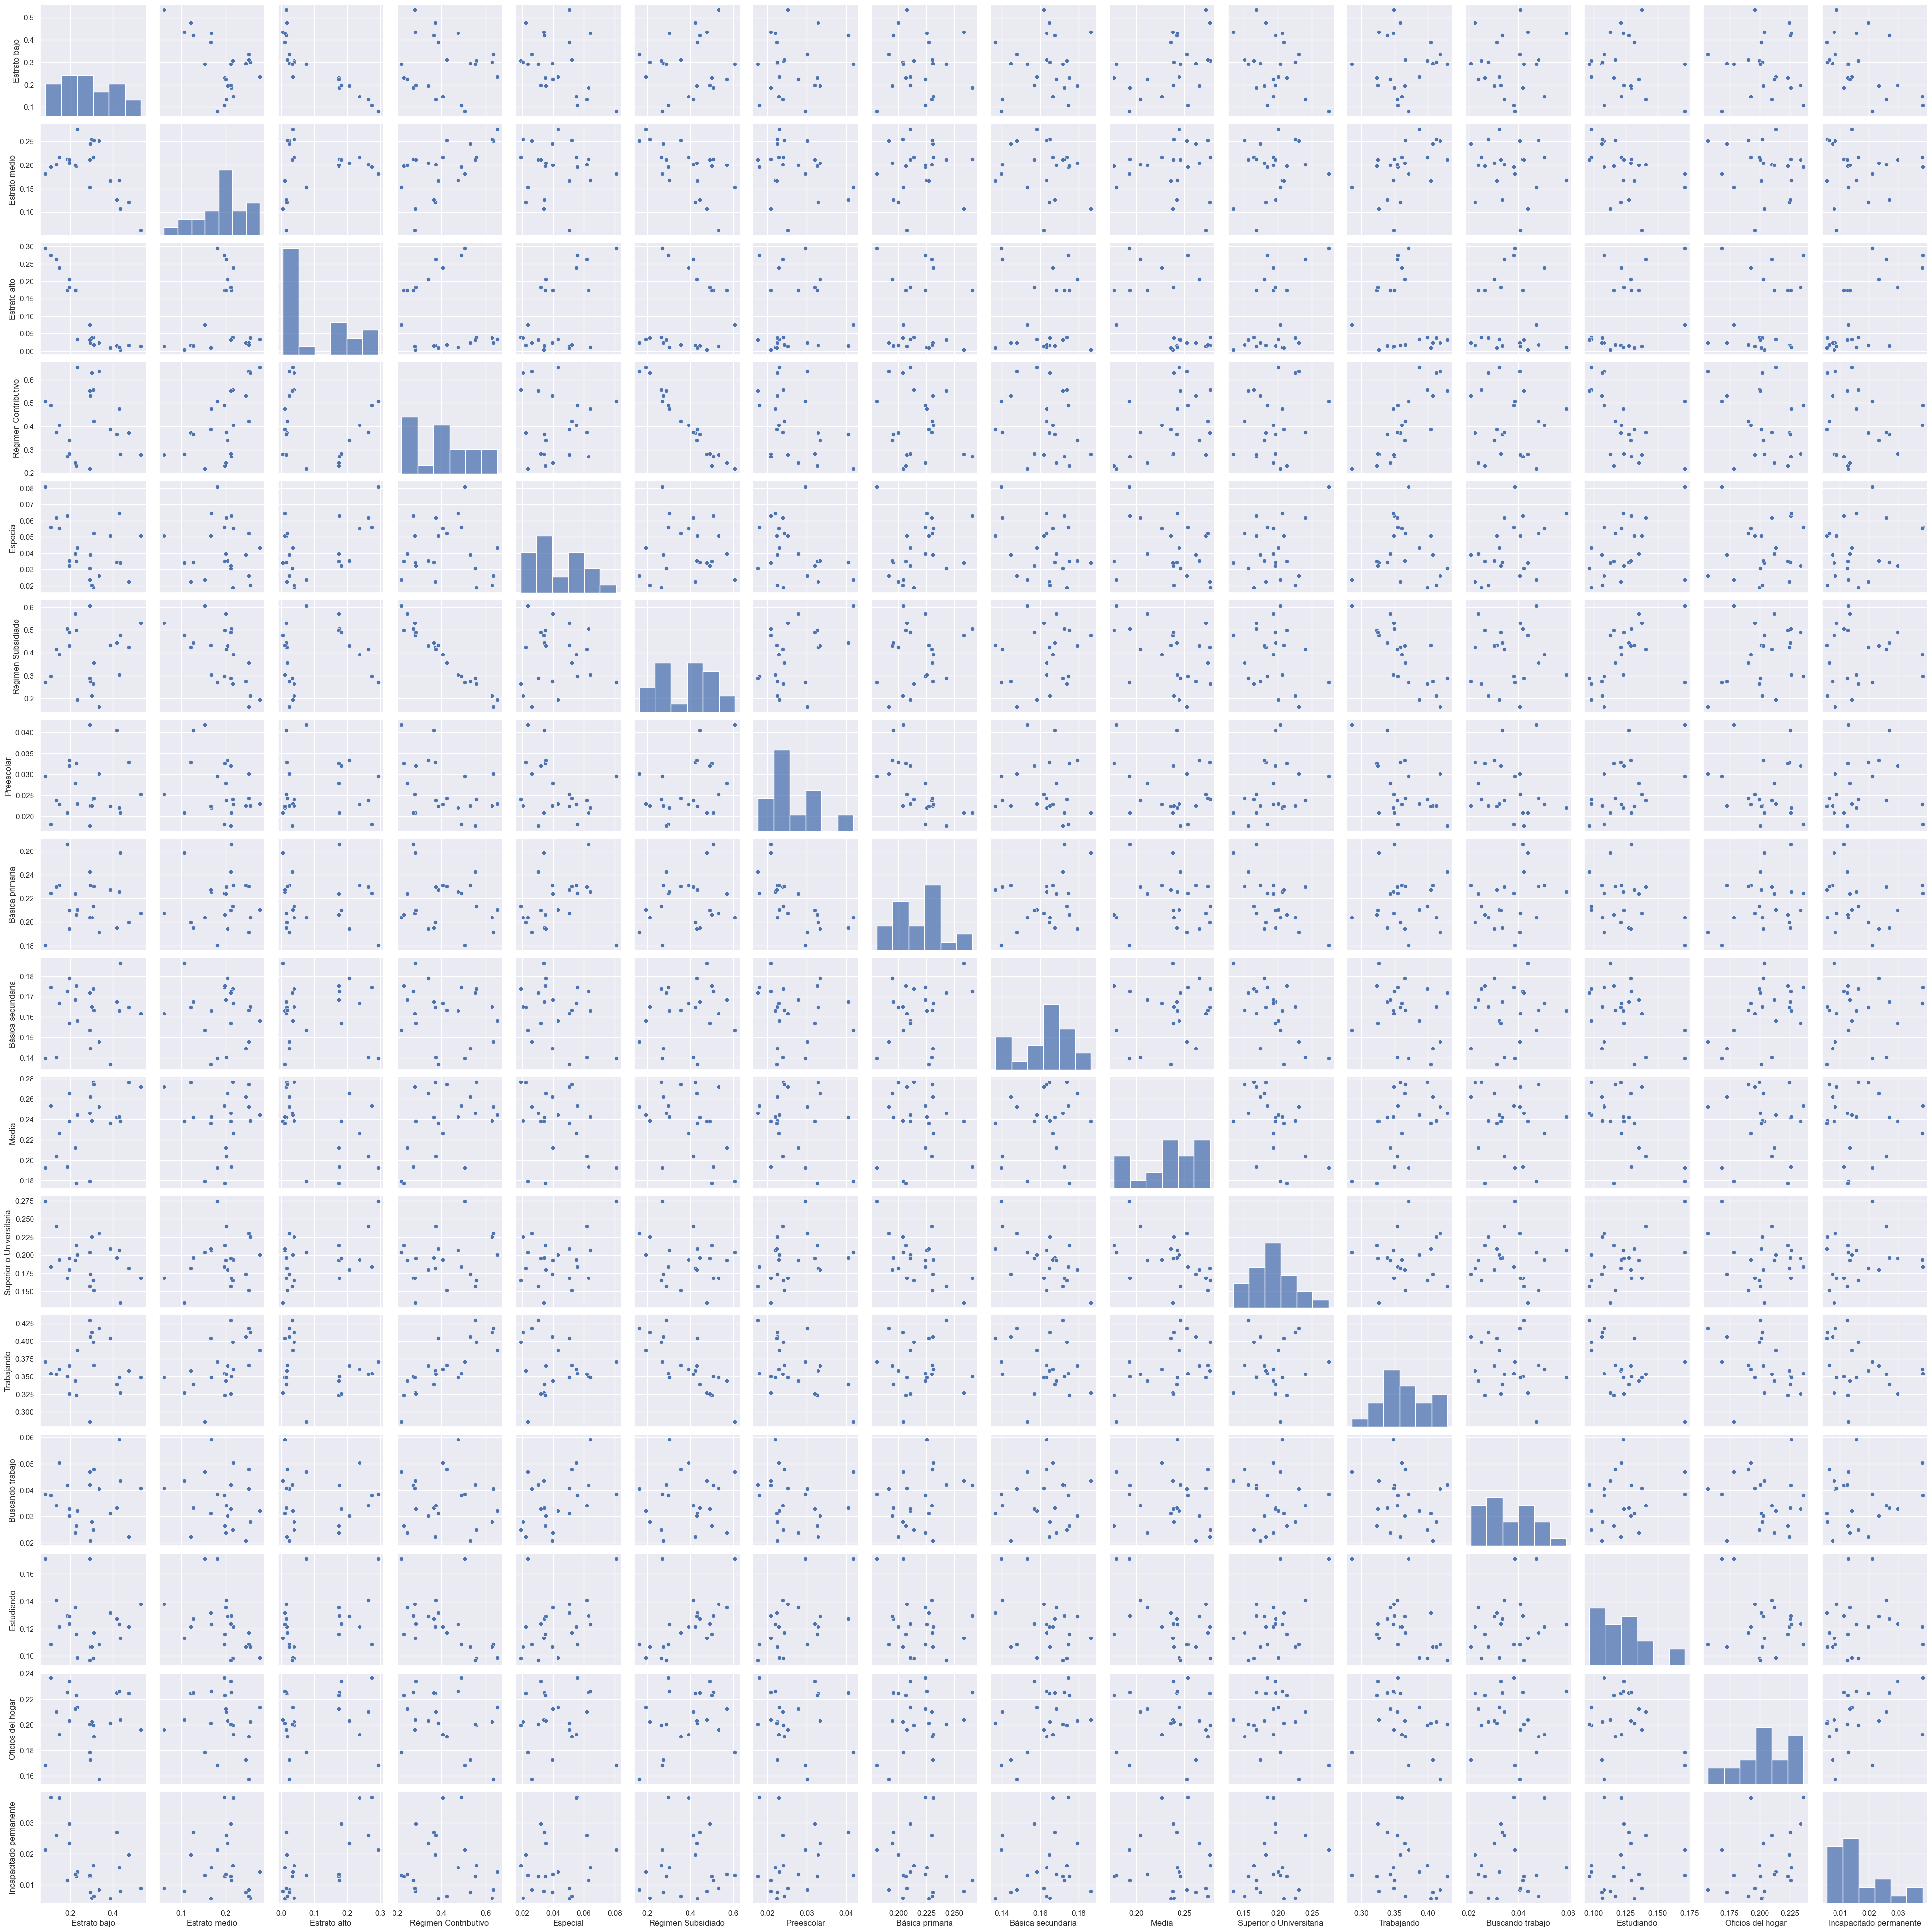

In [111]:
sns.set()
sns.pairplot(df_matrix)

<Axes: >

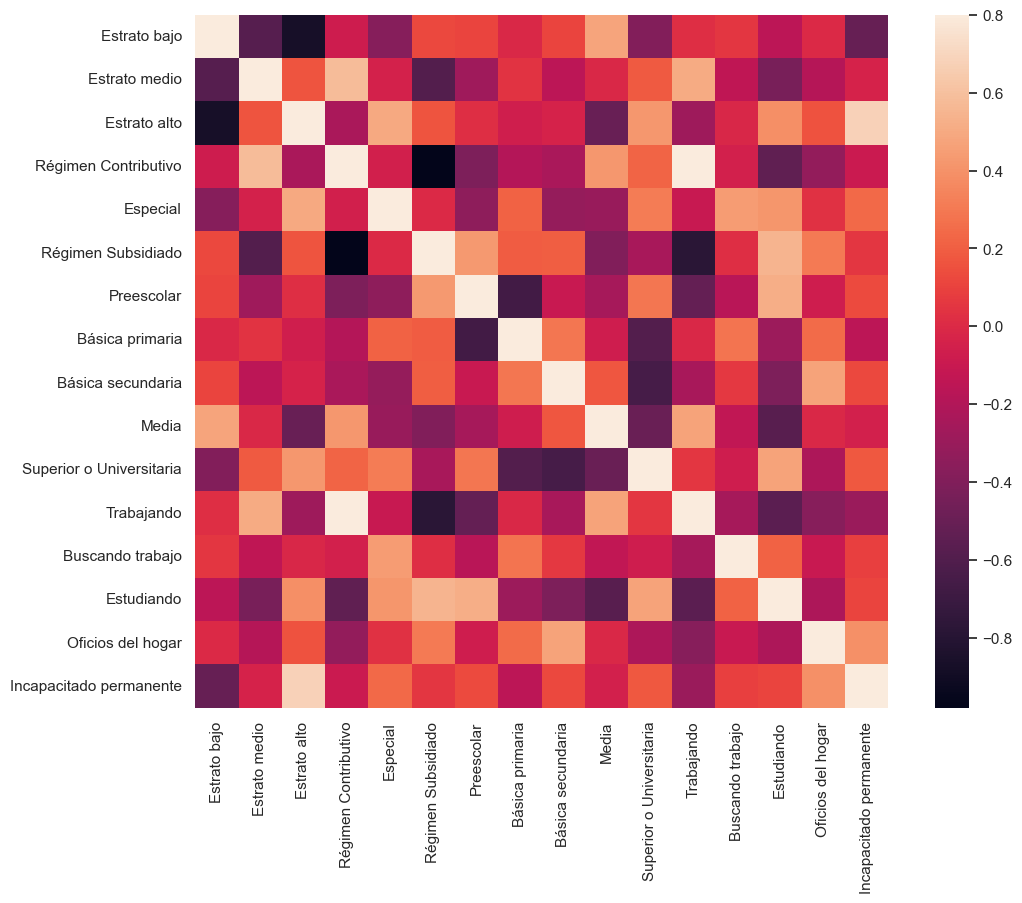

In [112]:
corrmat = df_matrix.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [ ]:
# Stratum 1 and 2 by city
cbaj17_dep = df_per2017[df_per2017['estrato'].isin([1,2])].groupby('depto').size() / df_per2017.groupby('depto').size()
cbaj18_dep = df_per2018[df_per2018['estrato'].isin([1,2])].groupby('depto').size() / df_per2018.groupby('depto').size()
cbaj19_dep = df_per2019[df_per2019['estrato'].isin([1,2])].groupby('depto').size() / df_per2019.groupby('depto').size()
cbaj20_dep = df_per2020[df_per2020['estrato'].isin([1,2])].groupby('depto').size() / df_per2020.groupby('depto').size()

# Stratum 3 and 4 by city
cmed17_dep = df_per2017[df_per2017['estrato'].isin([3,4])].groupby('depto').size() / df_per2017.groupby('depto').size()
cmed18_dep = df_per2018[df_per2018['estrato'].isin([3,4])].groupby('depto').size() / df_per2018.groupby('depto').size()
cmed19_dep = df_per2019[df_per2019['estrato'].isin([3,4])].groupby('depto').size() / df_per2019.groupby('depto').size()
cmed20_dep = df_per2020[df_per2020['estrato'].isin([3,4])].groupby('depto').size() / df_per2020.groupby('depto').size()

# Stratum 5 and 6 by city
calt17_dep = df_per2017[df_per2017['estrato'].isin([5,6])].groupby('depto').size() / df_per2017.groupby('depto').size()
calt18_dep = df_per2018[df_per2018['estrato'].isin([5,6])].groupby('depto').size() / df_per2018.groupby('depto').size()
calt19_dep = df_per2019[df_per2019['estrato'].isin([5,6])].groupby('depto').size() / df_per2019.groupby('depto').size()
calt20_dep = df_per2020[df_per2020['estrato'].isin([5,6])].groupby('depto').size() / df_per2020.groupby('depto').size()

C:\Users\Acer\AppData\Local\Temp\ipykernel_26860\3954256366.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matrix['estrato'] = df_matrix['estrato'].astype('float')
C:\Users\Acer\AppData\Local\Temp\ipykernel_26860\3954256366.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matrix['regimen'] = df_matrix['regimen'].astype('category')
C:\Users\Acer\AppData\Local\Temp\ipykernel_26860\3954256366.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

<Figure size 1500x800 with 0 Axes>

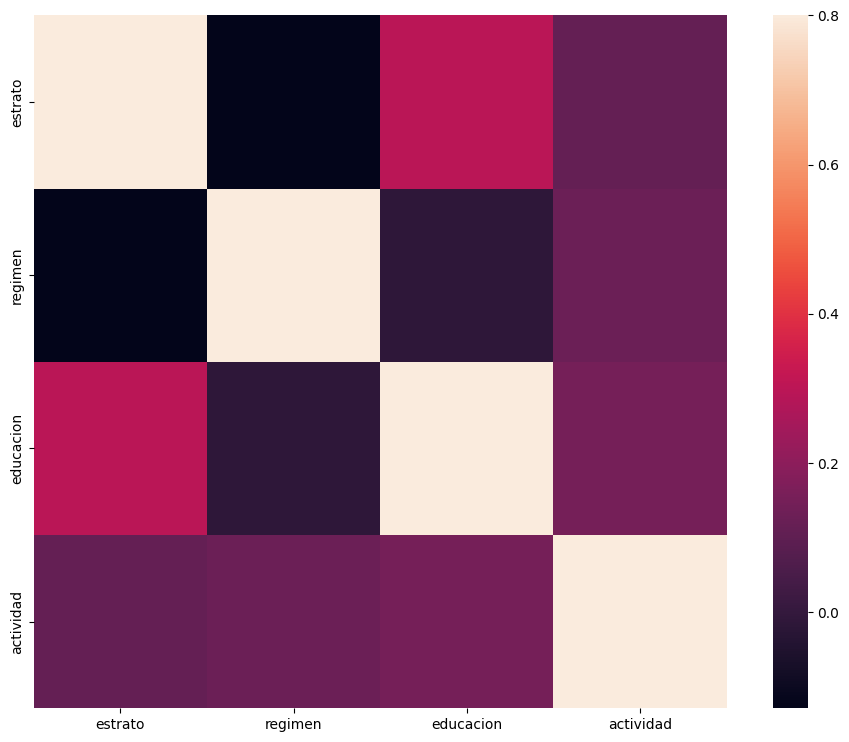

In [60]:
df_matrix = df_per[['estrato', 'regimen', 'educacion', 'actividad']]

# Correlation matrix

df_matrix['estrato'] = df_matrix['estrato'].astype('float')
df_matrix['regimen'] = df_matrix['regimen'].astype('category')
df_matrix['educacion'] = df_matrix['educacion'].astype('category')
df_matrix['actividad'] = df_matrix['actividad'].astype('category')

df_matrix.dtypes

df_matrix['regimen'] = df_matrix['regimen'].cat.codes
df_matrix['educacion'] = df_matrix['educacion'].cat.codes
df_matrix['actividad'] = df_matrix['actividad'].cat.codes

df_matrix.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(15, 8))

corrmat = df_matrix.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

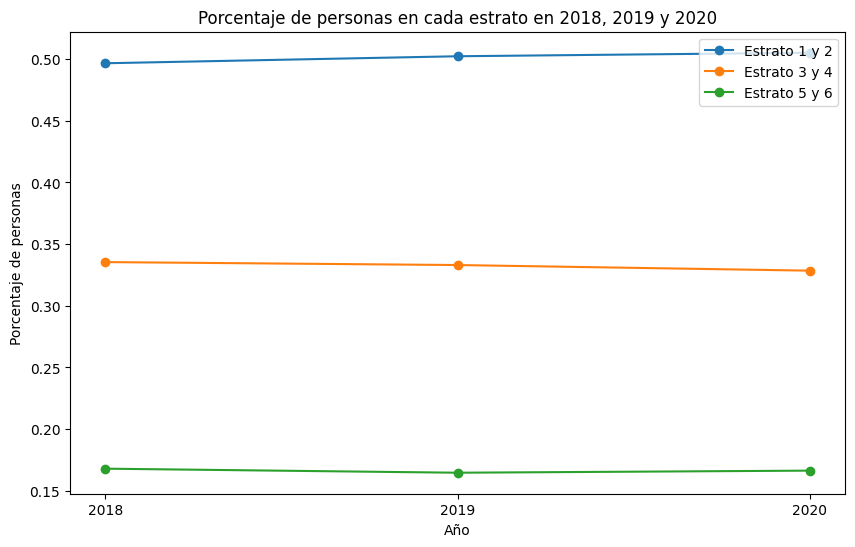

In [258]:
# Graph showing the percentage of people in each stratum in 2018, 2019 and 2020

fig, ax = plt.subplots(figsize=(10, 6))

# Data
years = ['2018', '2019', '2020']
cbaj = [cbaj18, cbaj19, cbaj20]
cmed = [cmed18, cmed19, cmed20]
calt = [calt18, calt19, calt20]

# Plot
ax.plot(years, cbaj, label='Estrato 1 y 2', marker='o')
ax.plot(years, cmed, label='Estrato 3 y 4', marker='o')
ax.plot(years, calt, label='Estrato 5 y 6', marker='o')

# Labels
ax.set_xlabel('Año')
ax.set_ylabel('Porcentaje de personas')
ax.set_title('Porcentaje de personas en cada estrato en 2018, 2019 y 2020')
ax.legend()

plt.show()

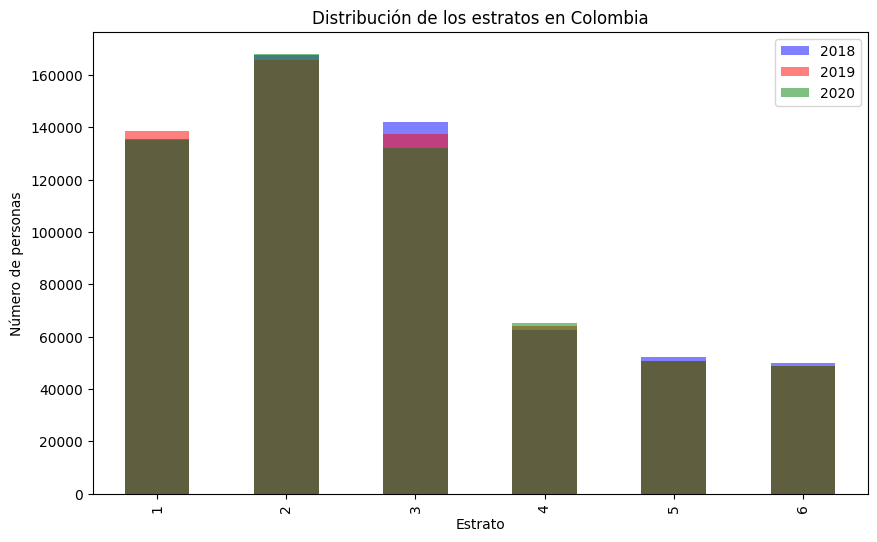

In [256]:
# Graph the stratum distribution

df_per2018['estrato'].value_counts().sort_index().plot(kind = 'bar', color = 'blue', alpha = 0.5, label = '2018', figsize = (10, 6))
df_per2019['estrato'].value_counts().sort_index().plot(kind = 'bar', color = 'red', alpha = 0.5, label = '2019', figsize = (10, 6))
df_per2020['estrato'].value_counts().sort_index().plot(kind = 'bar', color = 'green', alpha = 0.5, label = '2020', figsize = (10, 6))
plt.legend()
plt.title('Distribución de los estratos en Colombia')
plt.xlabel('Estrato')
plt.ylabel('Número de personas')
plt.show()


In [252]:
for d in sorted(df_per['dominio'].unique()):
    print(d)

Armenia
Barranquilla
Bogota
Bucaramanga
Cali
Cartagena
Cucuta
Florencia
Ibague
Manizales
Medellin
Monteria
Neiva
Pasto
Pereira
Popayan
Quibdo
Riohacha
Santa Marta
Sincelejo
Tunja
Valledupar
Villavicencio


In [ ]:
df_per2020[df_per2020['dominio'] == 'Medellin']['estrato1'].value_counts()

In [53]:
df_per2020['p6100'].value_counts()

p6100
1    257588
3    256608
      60240
2     24878
9       588
Name: count, dtype: int64

In [56]:
df_per2020['p6210'].value_counts()

p6210
6    154316
5    148492
3    127890
4     96288
      32413
1     25692
2     14622
9       189
Name: count, dtype: int64

In [57]:
df_per2020['p6240'].value_counts()

p6240
1    171585
4    154907
      99442
3     77825
6     59583
2     25043
5     11517
Name: count, dtype: int64

In [ ]:
df_per2020[df_per2020['dominio'] == 'Medellin']['estrato1'].value_counts()

In [22]:
df_per2020['depto'] = df_per2020['depto'].apply(lambda x: [depto[1] for depto in deptos if depto[0] == x][0])

In [25]:
# Applying the title case to the 'dominio' column
df_per2020['dominio'] = df_per2020['dominio'].str.title()

# Checking the result
df_per2020.head()

,directorio,secuencia_p,orden,clase,dominio,mes,estrato1,p6020,p6040,p6050,...,iof2es,iof3hes,iof3ies,iof6es,ingtotob,ingtotes,ingtot,fex_c,depto,fex_dpto
0,43,8,1,1,Bogota,3,2,1,47,1,...,,,,,0,,0,"135,612943246918",Bogotá D.C.,"135,612943246918"
1,43,9,1,1,Bogota,3,6,1,27,1,...,,,,,1450000,,1450000,"135,612943246918",Bogotá D.C.,"135,612943246918"
2,43,9,2,1,Bogota,3,6,1,19,,...,,,,,0,,0,"135,612943246918",Bogotá D.C.,"135,612943246918"
3,43,10,1,1,Bogota,3,2,2,57,1,...,,,,,0,,0,"135,612943246918",Bogotá D.C.,"135,612943246918"
4,47,1,1,1,Bucaramanga,3,2,1,39,1,...,,,,,2600000,,2600000,"32,0669509746784",Santander,"38,393863542672"


In [27]:
# Remove accents from the columns
df_per2020['depto'] = df_per2020['depto'].apply(remove_accents)

In [30]:
df_per2020['dominio'].unique()

array(['Bogota', 'Bucaramanga', 'Monteria', 'Medellin', 'Cucuta',
       'Riohacha', 'Barranquilla', 'Manizales', 'Quibdo', 'Armenia',
       'Villavicencio', 'Ibague', 'Cartagena', 'Pereira', 'Sincelejo',
       'Santa Marta', 'Cali', 'Florencia', 'Popayan', 'Tunja', 'Pasto',
       'Neiva', 'Valledupar', 'Resto Urbano', 'Rural'], dtype=object)

In [31]:
# Delete Resto Urbano and Resto Rural

df_per2020 = df_per2020[df_per2020['dominio'] != 'Resto Urbano']
df_per2020 = df_per2020[df_per2020['dominio'] != 'Rural']

In [40]:
df_per2020['year'] = 2020

In [41]:
df_per2020

,directorio,secuencia_p,orden,clase,dominio,mes,estrato1,p6020,p6040,p6050,...,iof3hes,iof3ies,iof6es,ingtotob,ingtotes,ingtot,fex_c,depto,fex_dpto,year
0,43,8,1,1,Bogota,3,2,1,47,1,...,,,,0,,0,"135,612943246918",Bogota D.C.,"135,612943246918",2020
1,43,9,1,1,Bogota,3,6,1,27,1,...,,,,1450000,,1450000,"135,612943246918",Bogota D.C.,"135,612943246918",2020
2,43,9,2,1,Bogota,3,6,1,19,,...,,,,0,,0,"135,612943246918",Bogota D.C.,"135,612943246918",2020
3,43,10,1,1,Bogota,3,2,2,57,1,...,,,,0,,0,"135,612943246918",Bogota D.C.,"135,612943246918",2020
4,47,1,1,1,Bucaramanga,3,2,1,39,1,...,,,,2600000,,2600000,"32,0669509746784",Santander,"38,393863542672",2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747817,5328223,1,2,1,Armenia,12,6,2,52,2,...,,,,0,,0,"8,69691236025917",Quindio,"9,24581233082101",2020
747818,5328224,1,1,1,Bucaramanga,12,3,1,26,1,...,,,,"1477666,66666667",,"1477666,66666667","44,8185575865692",Santander,"44,3426458410902",2020
747819,5328224,1,2,1,Bucaramanga,12,3,2,20,2,...,,,,"1129333,33333333",,"1129333,33333333","44,8185575865692",Santander,"44,3426458410902",2020
747820,5328224,2,1,1,Bucaramanga,12,3,1,23,1,...,,,,"1427666,66666667",,"1427666,66666667","44,8185575865692",Santander,"44,3426458410902",2020


In [39]:
df_per2020[df_per2020['dominio'] == 'Medellin']['estrato1'].value_counts()

estrato1
2    14205
3    12404
1     5294
4     3516
5     1766
6     1059
Name: count, dtype: int64

In [28]:
df_per2020.head()

,directorio,secuencia_p,orden,clase,dominio,mes,estrato1,p6020,p6040,p6050,...,iof2es,iof3hes,iof3ies,iof6es,ingtotob,ingtotes,ingtot,fex_c,depto,fex_dpto
0,43,8,1,1,Bogota,3,2,1,47,1,...,,,,,0,,0,"135,612943246918",Bogota D.C.,"135,612943246918"
1,43,9,1,1,Bogota,3,6,1,27,1,...,,,,,1450000,,1450000,"135,612943246918",Bogota D.C.,"135,612943246918"
2,43,9,2,1,Bogota,3,6,1,19,,...,,,,,0,,0,"135,612943246918",Bogota D.C.,"135,612943246918"
3,43,10,1,1,Bogota,3,2,2,57,1,...,,,,,0,,0,"135,612943246918",Bogota D.C.,"135,612943246918"
4,47,1,1,1,Bucaramanga,3,2,1,39,1,...,,,,,2600000,,2600000,"32,0669509746784",Santander,"38,393863542672"


In [ ]:
# Replace deptos in the dataframe

def replace_deptos(df, deptos):
    for d in deptos:
        df['DEPTO'] = df['DEPTO'].replace(d[0], d[1])
    return df

In [ ]:
# Filtramos las 5 ciudades más importantes
indep = [5, 11, 76, 8, 13]
dep20 = df_2020.set_index("depto").loc[indep]
dep20.head()